# GPT-2 Training Metrics Visualization

This notebook parses the training log file and plots the following metrics:
- Training loss over time
- Validation loss over time
- Hellaswag accuracy over time

In [8]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

## Parse the Log File

First, we'll parse the log file to extract the training loss, validation loss, and Hellaswag accuracy.

In [9]:
# Path to the log file
log_file_path = '../logs/log.txt'

# Initialize lists to store the data
train_steps = []
train_losses = []

val_steps = []
val_losses = []
hellaswag_accuracies = []

# Regular expressions to match the different log entries
train_loss_pattern = re.compile(r'^(\d+): Loss (\d+\.\d+)')
val_loss_pattern = re.compile(r'^(\d+): validation loss: (\d+\.\d+)')
hellaswag_pattern = re.compile(r'^(\d+): Hellaswag accuracy normalized: (\d+\.\d+)')

# Parse the log file
with open(log_file_path, 'r') as f:
    for line in f:
        # Check for training loss
        train_match = train_loss_pattern.match(line)
        if train_match:
            step = int(train_match.group(1))
            loss = float(train_match.group(2))
            train_steps.append(step)
            train_losses.append(loss)
            continue
            
        # Check for validation loss
        val_match = val_loss_pattern.match(line)
        if val_match:
            step = int(val_match.group(1))
            loss = float(val_match.group(2))
            val_steps.append(step)
            val_losses.append(loss)
            continue
            
        # Check for Hellaswag accuracy
        hellaswag_match = hellaswag_pattern.match(line)
        if hellaswag_match:
            step = int(hellaswag_match.group(1))
            accuracy = float(hellaswag_match.group(2))
            hellaswag_accuracies.append(accuracy)
            continue

print(f"Parsed {len(train_steps)} training steps")
print(f"Parsed {len(val_steps)} validation steps")
print(f"Parsed {len(hellaswag_accuracies)} Hellaswag accuracy entries")

Parsed 19073 training steps
Parsed 78 validation steps
Parsed 78 Hellaswag accuracy entries


## Create DataFrames for the Metrics

Now we'll create pandas DataFrames to make it easier to work with the data.

In [10]:
# Create DataFrames
train_df = pd.DataFrame({
    'Step': train_steps,
    'Loss': train_losses
})

val_df = pd.DataFrame({
    'Step': val_steps,
    'Loss': val_losses,
    'Hellaswag Accuracy': hellaswag_accuracies
})

# Display the first few rows of each DataFrame
print("Training Data:")
display(train_df.head())

print("\nValidation Data:")
display(val_df.head())

Training Data:


,Step,Loss
0,0,10.936560
1,1,10.882706
2,2,10.773497
3,3,10.627394
4,4,10.468100



Validation Data:


,Step,Loss,Hellaswag Accuracy
0,0,10.9366,0.2410
1,250,6.2907,0.2432
2,500,5.5076,0.2370
3,750,4.9375,0.2413
4,1000,4.4842,0.2515


## Plot Training Loss

Let's plot the training loss over time.

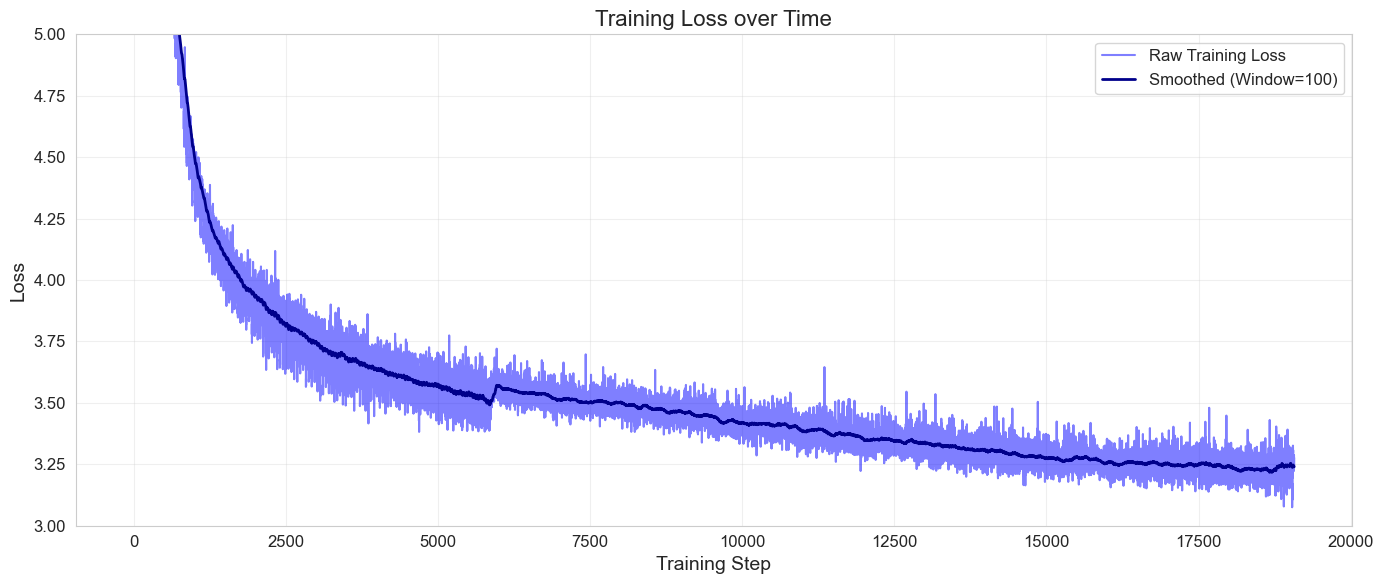

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train_df['Step'], train_df['Loss'], color='blue', alpha=0.5, label='Raw Training Loss')

# Add smoothed version of the loss curve
window_size = 100
if len(train_df) > window_size:
    smoothed_loss = train_df['Loss'].rolling(window=window_size).mean()
    plt.plot(train_df['Step'][window_size-1:], smoothed_loss[window_size-1:], 
             color='darkblue', linewidth=2, label=f'Smoothed (Window={window_size})')

plt.ylim(3, 5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.title('Training Loss over Time', fontsize=16)
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Plot Validation Loss

Now let's plot the validation loss over time.

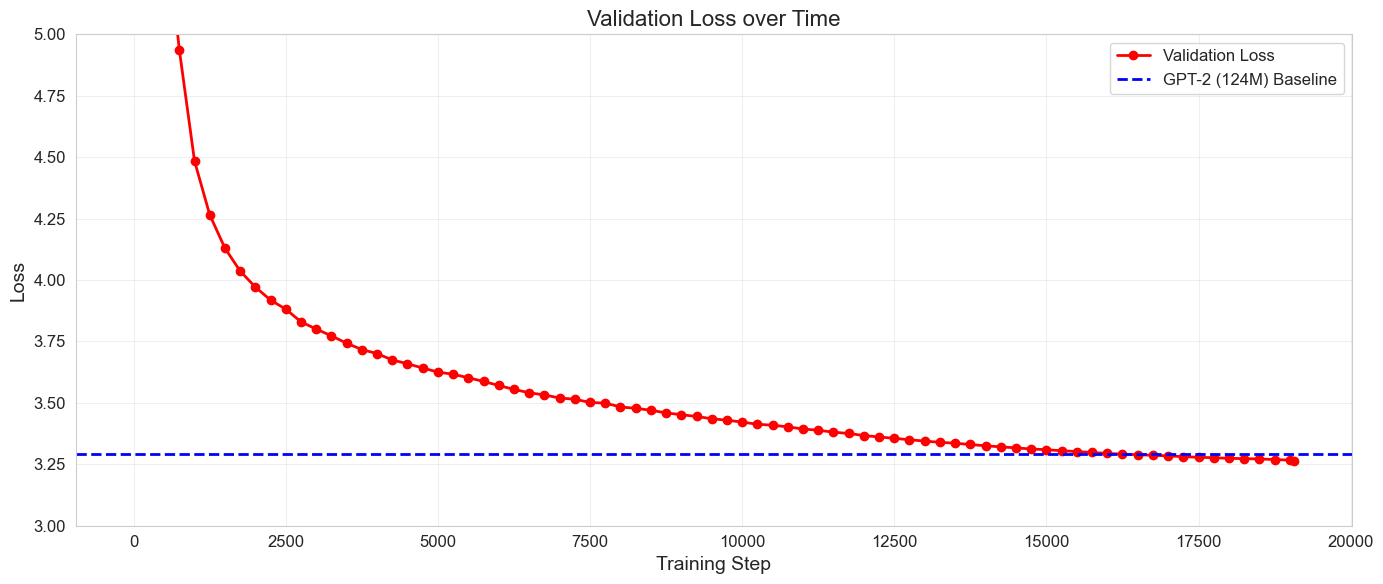

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(val_df['Step'], val_df['Loss'], color='red', marker='o', linestyle='-', linewidth=2, label='Validation Loss')

# Add GPT-2 baseline line
gpt2_baseline = 3.2924
plt.axhline(y=gpt2_baseline, color='blue', linestyle='--', linewidth=2, label='GPT-2 (124M) Baseline')

plt.ylim(3, 5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.title('Validation Loss over Time', fontsize=16)
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Plot Hellaswag Accuracy

Let's plot the Hellaswag accuracy over time.

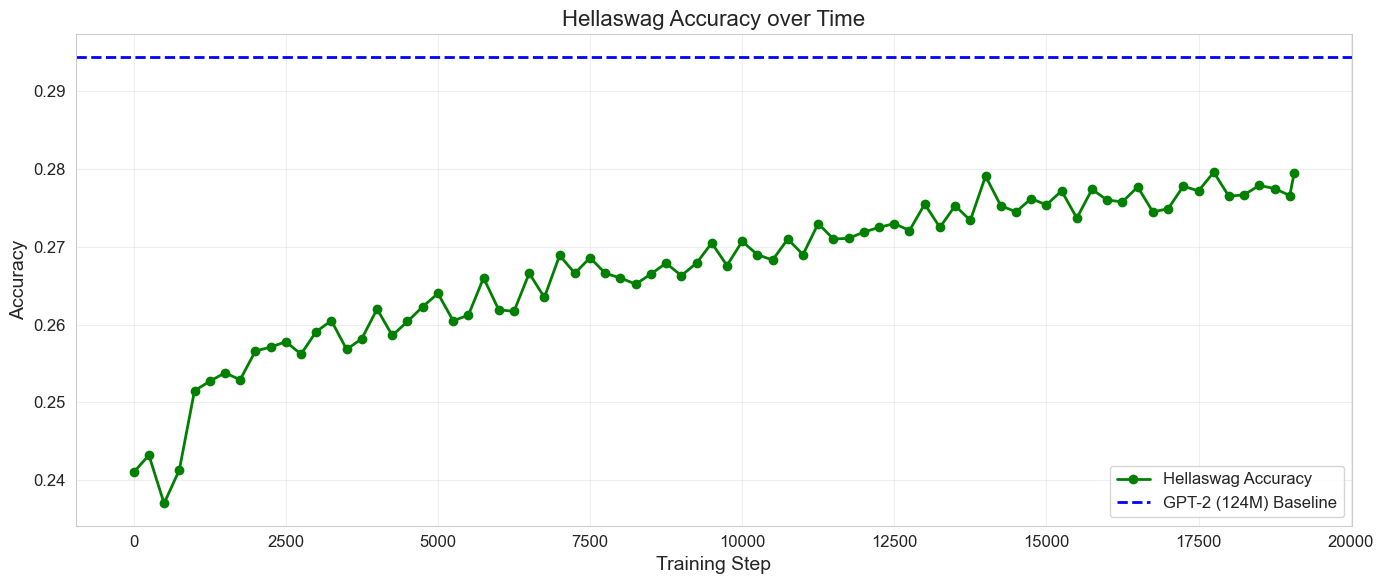

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(val_df['Step'], val_df['Hellaswag Accuracy'], color='green', marker='o', linestyle='-', linewidth=2, label='Hellaswag Accuracy')

# Add GPT-2 baseline line
gpt2_baseline_accuracy = 0.294463
plt.axhline(y=gpt2_baseline_accuracy, color='blue', linestyle='--', linewidth=2, label='GPT-2 (124M) Baseline')

plt.title('Hellaswag Accuracy over Time', fontsize=16)
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
